In [83]:
import pandas as pd
import spacy
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [84]:
df = pd.read_csv('/content/labeled_data.csv')

In [85]:
df.shape

(24783, 7)

In [86]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [87]:
df.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [88]:
#deleting unwanted columns
df.drop(columns = ['Unnamed: 0','count','hate_speech','offensive_language','neither'],inplace = True)

In [89]:
df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [90]:
#check null values
df.isna().sum()

,0
class,0
tweet,0


In [91]:
df['tweet'].iloc[0]

"!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out..."

In [92]:
df['tweet'].iloc[1000]

'&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;"@betysweetcocker: That pussy is just....&#128561; imma assume she just had a baby like..the day before"'

In [93]:
#deleting unwanted symbols and numeric data
df['processed_tweet'] = df['tweet'].str.replace(r'[^a-zA-Z]',' ',regex=True)

In [94]:
df.head()

,class,tweet,processed_tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,RT mayasolovely As a woman you shouldn t...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,RT mleew boy dats cold tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,RT UrKindOfBrand Dawg RT sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,RT C G Anderson viva based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,RT ShenikaRoberts The shit you...


In [95]:
df['processed_tweet'].iloc[1000]

'                                                                 betysweetcocker  That pussy is just              imma assume she just had a baby like  the day before '

In [96]:
#handling unwanted spaces
df['processed_tweet_2'] = df['processed_tweet'].str.replace(r'[\s]+',' ',regex=True)

In [97]:
df['processed_tweet_2'].iloc[1000]

' betysweetcocker That pussy is just imma assume she just had a baby like the day before '

In [98]:
#deleting unwanted columns
df.drop(columns = ['tweet',"processed_tweet"],inplace=True)

In [99]:
df.head()

,class,processed_tweet_2
0,2,RT mayasolovely As a woman you shouldn t comp...
1,1,RT mleew boy dats cold tyga dwn bad for cuffi...
2,1,RT UrKindOfBrand Dawg RT sbaby life You ever ...
3,1,RT C G Anderson viva based she look like a tr...
4,1,RT ShenikaRoberts The shit you hear about me ...


In [100]:
# NLP
nlp = spacy.load('en_core_web_sm')

In [101]:
#lemmitization
def lemmitization(text):
  doc = nlp(text)
  lemmaList = [word.lemma_ for word in doc]
  return ' '.join(lemmaList)

In [102]:
df['lemma_tweet'] = df['processed_tweet_2'].apply(lemmitization)

In [103]:
df.head()

,class,processed_tweet_2,lemma_tweet
0,2,RT mayasolovely As a woman you shouldn t comp...,RT mayasolovely as a woman you shouldn t com...
1,1,RT mleew boy dats cold tyga dwn bad for cuffi...,RT mleew boy dat cold tyga dwn bad for cuffi...
2,1,RT UrKindOfBrand Dawg RT sbaby life You ever ...,RT UrKindOfBrand Dawg RT sbaby life you ever...
3,1,RT C G Anderson viva based she look like a tr...,RT C G Anderson viva base she look like a tr...
4,1,RT ShenikaRoberts The shit you hear about me ...,RT ShenikaRoberts the shit you hear about I ...


In [104]:
df['processed_tweet_2'].iloc[67]

' Allyhaaaaa Lemmie eat a Oreo amp do these dishes One oreo Lol'

In [105]:
df['lemma_tweet'].iloc[67]

'  Allyhaaaaa Lemmie eat a Oreo amp do these dish one oreo lol'

In [106]:
def remove_stopwords(text):
  doc=nlp(text)
  no_stopwords_list = [word.text for word in doc if word.is_stop]
  return ' '.join(no_stopwords_list)

In [107]:
#removing stopwords
df['final_tweet'] = df['lemma_tweet'].apply(remove_stopwords)

In [108]:
df['lemma_tweet'].iloc[67]

'  Allyhaaaaa Lemmie eat a Oreo amp do these dish one oreo lol'

In [109]:
df['final_tweet'].iloc[67]

'a do these one'

In [110]:
df.head()

,class,processed_tweet_2,lemma_tweet,final_tweet
0,2,RT mayasolovely As a woman you shouldn t comp...,RT mayasolovely as a woman you shouldn t com...,as a you about up your as a you should always ...
1,1,RT mleew boy dats cold tyga dwn bad for cuffi...,RT mleew boy dat cold tyga dwn bad for cuffi...,for in the
2,1,RT UrKindOfBrand Dawg RT sbaby life You ever ...,RT UrKindOfBrand Dawg RT sbaby life you ever...,you ever a and she to you be as
3,1,RT C G Anderson viva based she look like a tr...,RT C G Anderson viva base she look like a tr...,she a
4,1,RT ShenikaRoberts The shit you hear about me ...,RT ShenikaRoberts the shit you hear about I ...,the you about I might be or it might be than t...


In [111]:
#one-hot representation
vocab_size = 10000
one_hot_representation = [one_hot(words,vocab_size) for words in df['final_tweet']]

In [112]:
df['final_tweet'].iloc[0]

'as a you about up your as a you should always take the out'

In [113]:
one_hot_representation[0]

[3314,
 5388,
 8964,
 8802,
 3759,
 8849,
 3314,
 5388,
 8964,
 9406,
 2588,
 8523,
 8270,
 4113]

In [114]:
one_hot_representation[1]

[4492, 5772, 8270]

In [115]:
#As the size of one hot represenation are different we will require to give padding
#let's keep a default sentence length
sentence_length = 20
embedded_tweet = pad_sequences(one_hot_representation ,padding = 'pre',maxlen = sentence_length)


In [116]:
for i in range(0,4):
  print(embedded_tweet[i])

[   0    0    0    0    0    0 3314 5388 8964 8802 3759 8849 3314 5388
 8964 9406 2588 8523 8270 4113]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0 4492 5772 8270]
[   0    0    0    0    0    0    0    0    0    0    0 8964 9103 5388
 1867  821 4362 8964 1431 3314]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0  821 5388]


In [117]:
#x is our input data and y is output label
x = np.array(embedded_tweet)
y = np.array(df['class'])

In [118]:
df['class'].value_counts()

,count
class,
1,19190
2,4163
0,1430


In [119]:
# the dataset is highly imbalanced as number of class 0, class 1, and class 2 are very much different
smote = SMOTE(sampling_strategy='minority')
x, y = smote.fit_resample(x,y)

In [120]:
#train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [121]:
x.shape, x_train.shape, x_test.shape

((42543, 20), (34034, 20), (8509, 20))

In [129]:
model = keras.Sequential([
    #embedding layer
    keras.layers.Embedding(vocab_size,dimension),
    #Bidirectional LSTM Layers (stacked)
    keras.layers.Bidirectional(keras.layers.LSTM(100,return_sequences=True)),
    keras.layers.Bidirectional(keras.layers.LSTM(50,return_sequences=True)),
    keras.layers.Bidirectional(keras.layers.LSTM(50)),
    #output layer
    keras.layers.Dense(3,activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [130]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_9 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_10                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_11                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [131]:
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.7486 - loss: 0.5988
Epoch 2/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.8188 - loss: 0.4501
Epoch 3/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.8291 - loss: 0.4332
Epoch 4/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.8303 - loss: 0.4297
Epoch 5/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.8347 - loss: 0.4232
Epoch 6/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.8349 - loss: 0.4202
Epoch 7/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.8356 - loss: 0.4182
Epoch 8/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.8379 - loss: 0.4125
Epoch 9/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.8338 - loss: 0.4150
Epoch 10/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.8352 - loss: 0.4119


In [132]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Model accuracy: {accuracy}")

266/266 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8257 - loss: 0.4434
Model accuracy: 0.823481023311615


In [133]:
pred = np.argmax(model.predict(x_test), axis=-1)

266/266 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [134]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      3812
           1       0.78      0.89      0.83      3807
           2       0.58      0.09      0.16       890

    accuracy                           0.82      8509
   macro avg       0.75      0.64      0.63      8509
weighted avg       0.80      0.82      0.79      8509



<Axes: >

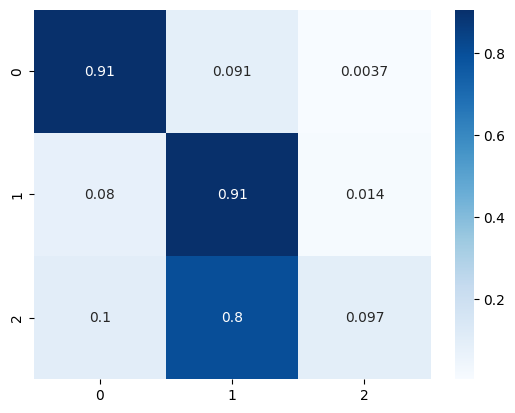

In [128]:
cf = confusion_matrix(y_test, pred, normalize='true')
sns.heatmap(cf, annot=True, cmap='Blues')

Based on the current Based on the current execution results, there doesn't seem to be a significant change in the model's overall accuracy or the performance metrics for each class after switching to Bidirectional LSTM layers. The accuracy remains the same at approximately 82.35%, and the precision, recall, and f1-scores for all classes are identical to the previous results.

This could be due to several reasons, such as:

The dataset's characteristics might not benefit significantly from the bidirectional context captured by the Bi-LSTM for this specific task with the current hyperparameter settings.
The model might require more epochs of training to fully leverage the new architecture.
Other hyperparameters (e.g., learning rate, number of units in LSTM layers, batch size) might need further tuning to see a noticeable improvement.
The random initialization of weights and fixed random_state for train-test split might lead to similar outcomes in some runs.